# Kaggle Learn - Data Visualization

Working through lessons from https://www.kaggle.com/learn/data-visualisation

## Level 1, Part 6 - Plotting with Seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('max_rows', 9)
#plt.style.available

### Plotting with Seaborn

Seaborn is powerful, standalone python package for plotting data. It is designed to work with tabular data (where each row is a record), requiring much less manipulation of tables to produce plots. It also has additional features for analysis and visualization, making it the general tool of choice.  

**sns.countplot()**
* Seaborn's bar chart - performs aggregation from table.<br>
* Good for nominal and small ordinal categorical data.<br>
<br>
    
**sns.kdeplot()**
* Seaborn's closest analog to a line plot - performs a kernel density estimate<br>
* Good for interval data (generally better than a line plot).<br>
* Worse for ordinal data because it fits to intermediate categories that don't exist.<br>
* Can also be applied to bivariate data
    + Alternative to scatter or hex plots
    + Solve overplotting
    + But computationally intensive
<br>

**sns.distplot()**
* Seaborn's equivalent to a histogram<br>
<br>

**sns.jointplot()**
* Seaborn's composite for scatter or hex (kind='hex') plots<br>
* Good for interval and some nominal categorical data.<br>
<br>

**sns.boxplot()**
* Seaborn's box plot<br>
* Whiskers as range, 25% to 75% box, line at mean, outliers as circles<br>
  + Assume data is roughly normal for this to make sense<br>
* Good for interval data by category<br>
<br> 
  
**sns.violinplot()**
* Seaborn's violin plots<br>
* Replace box with KDE of distribution<br>
* Good for interval data by category.<br>

<br>

In [3]:
# Dataframe for examples
reviews = pd.read_csv("../pandas/data/winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


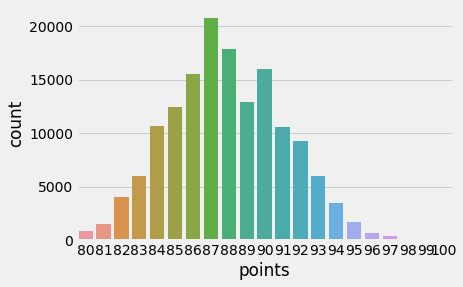

In [4]:
# Bar chart
sns.countplot(reviews['points'])
plt.show()

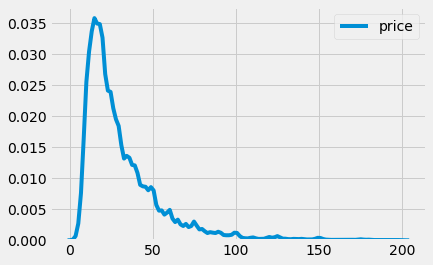

In [5]:
# Seaborn - line plot with kernal density estimate
sns.kdeplot(reviews.query('price < 200').price)
plt.show()

In [6]:
reviews.query('price < 200').price

1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 136368, dtype: float64

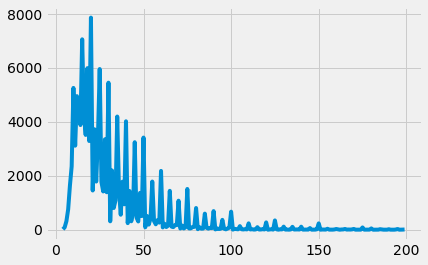

In [7]:
# Pandas line plot for comparison to KDE
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()
plt.show()

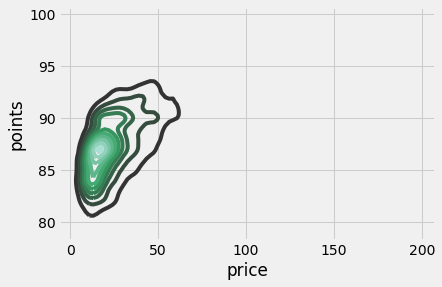

In [8]:
# 2D KDE plot
reviews_sample = (reviews[reviews['price'] < 200]
 .loc[:, ['price', 'points']].dropna().sample(5000))

sns.kdeplot(reviews_sample.price, reviews_sample.points)
plt.show()

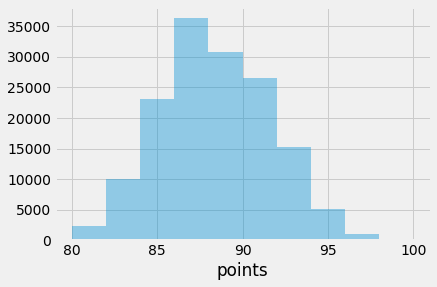

In [7]:
# Seaborn histogram
sns.distplot(reviews['points'], bins=10, kde=False)
plt.show()

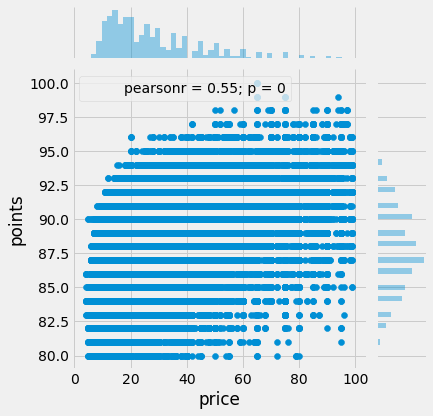

In [8]:
# Seaborn scatter plot
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])
plt.show()

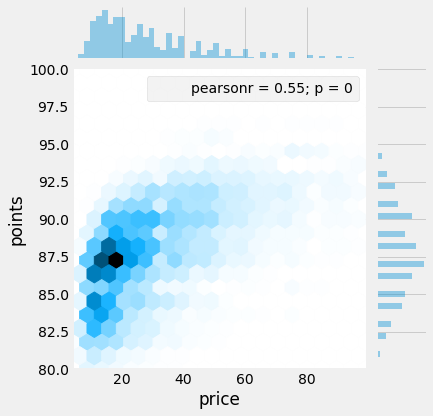

In [9]:
# Seaborn hex plot
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100],
              kind='hex', gridsize=20)
plt.show()

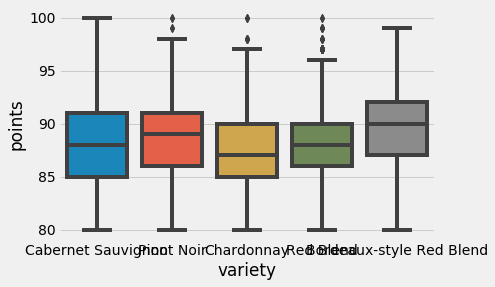

In [10]:
# Box plot

  # for top 5 varieties by count 
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(x='variety', y='points', data=df)
plt.show()

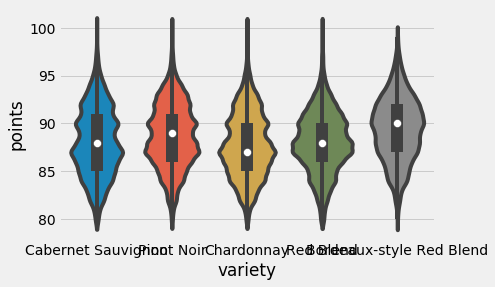

In [11]:
# Violin plot
sns.violinplot(x='variety', y='points', data=df)
plt.show()


#### Exercises

In [12]:
pd.set_option('max_columns', None)
pokemon = pd.read_csv("data/pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


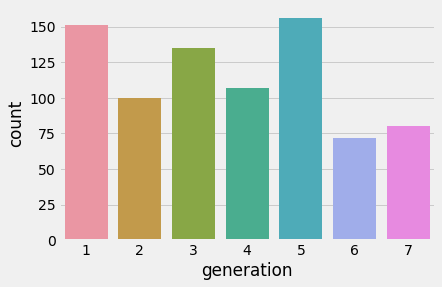

In [13]:
sns.countplot(pokemon['generation'])
plt.show()


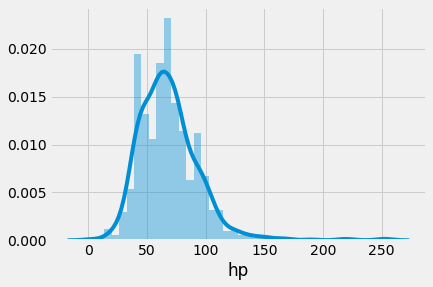

In [14]:
sns.distplot(pokemon.hp)
plt.show()

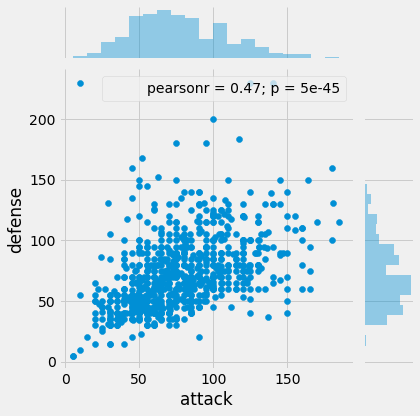

In [15]:
sns.jointplot(pokemon.attack, pokemon.defense)
plt.show()

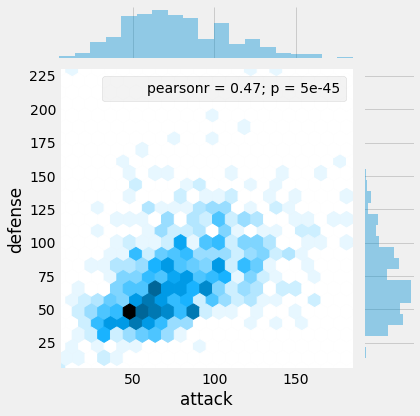

In [18]:
sns.jointplot(pokemon.attack, pokemon.defense, kind='hex')
plt.show()

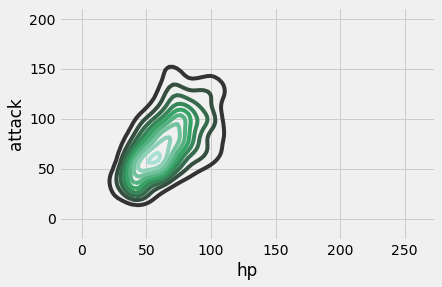

In [19]:
sns.kdeplot(pokemon.hp, pokemon.attack)
plt.show()

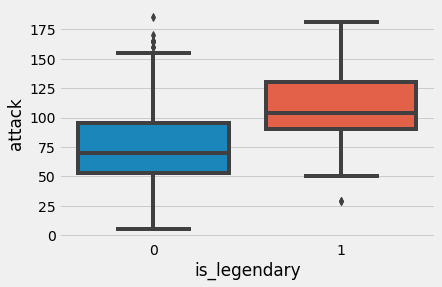

In [26]:
#sns.boxplot(pokemon.is_legendary, pokemon.attack)
sns.boxplot(x='is_legendary', y='attack', data=pokemon)
plt.show()

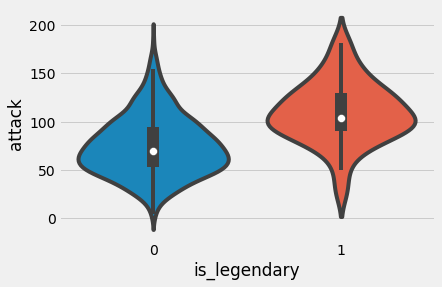

In [25]:
#sns.violinplot(pokemon.is_legendary, pokemon.attack)
sns.violinplot(x='is_legendary', y='attack', data=pokemon)
plt.show()